In [1]:
! pip install result
! pip install google-play-scraper
! pip install textblob
! pip install vaderSentiment
! pip install tabulate
! pip install gensim

In [2]:

from google_play_scraper import Sort, reviews_all, reviews
import csv
from textblob import TextBlob
from tabulate import tabulate
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gensim import corpora, models


import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def removeStuff(inputString):
    punctuation = """!"#$%&'()*+,-./:;<=>?@[]^_`{|}~•"""
    arr = []
    removedPunctuation = []
    removeWhiteSpaces = []
    lowerCaseString = []
    stopWordsString = []
    stemmingString = []
    lemmatizationString = []
    finalOutputArr = []
    line = str

    for i in inputString:
        if i in punctuation:
            inputString = inputString.replace(i, "")
    arr = inputString.split()

    removedPunctuation.append(line)

    for i in range(len(arr)):
        # replace numbers
        if arr[i] == "0":
            arr[i] = 'zero'
        if arr[i] == "1":
            arr[i] = 'one'
        if arr[i] == "2":
            arr[i] = 'two'
        if arr[i] == "3":
            arr[i] = 'three'
        if arr[i] == "4":
            arr[i] = 'four'
        if arr[i] == "5":
            arr[i] = 'five'
        if arr[i] == "6":
            arr[i] = 'six'
        if arr[i] == "7":
            arr[i] = 'seven'
        if arr[i] == "8":
            arr[i] = 'eight'
        if arr[i] == "9":
            arr[i] = 'nine'
        if arr[i] == "10":
            arr[i] = 'ten'


    stopWords = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during',
                 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours',
                 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from',
                 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his',
                 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our',
                 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at',
                 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves',
                 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he',
                 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after',
                 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how',
                 'further', 'was', 'here', 'than']
    tmpArr = arr

    # remove extra white spaces
    tmpString = ' '.join(map(str, tmpArr))
    # turn all words in to lowercase
    removeWhiteSpaces.append(tmpString)
    tmpString = tmpString.lower()
    lowerCaseString.append(tmpString)


    # remove stopwords
    for i in range(len(arr)):
        if arr[i] in stopWords:
            arr[i] = ""  # make all stop words empty
    arr = list(filter(None, arr))  # remove all empty elements

    stopWordsArr = arr
    # remove extra white spaces
    stopString = ' '.join(map(str, stopWordsArr))
    # turn all words in to lowercase
    stopString = stopString.lower()
    stopWordsString.append(stopString)

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    sentence_words = nltk.word_tokenize(stopString)
    for i in range(len(arr)):
        arr[i] = lemmatizer.lemmatize(arr[i])


    lemmatizationArr = arr

    # remove extra white spaces
    myString = ' '.join(map(str, lemmatizationArr))
    # turn all words in to lowercase
    myString = myString.lower()
    lemmatizationString.append(myString)

    finalOutputArr.append(myString)
    return myString



preProcessedArr = []
postProcessedArr = []

#for part 3
fonPart3 = []
fonAccessPart3 = []
autoAwayPart3 = []
fooCamPart3 = []
instantReadMePart3 = []

#for part 4
networkAnalyzer = []
autoConnect = []
speedTest = []
freeWiFi = []


#similar apps
result, continuation_token = reviews(
    'net.techet.netanalyzerlite.an',
    lang='en',  # defaults to 'en'
    country='us',  # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
    count=1000,  # defaults to 100
    filter_score_with=None  # defaults to None(means all score)
)
for i in range(len(result)):
    newResult = removeStuff(deEmojify(result[i]['content']))
    networkAnalyzer.append(newResult)
    
    
#Competitor apps
#auto Connect
result, continuation_token = reviews(
    'com.easyway.freewifi',
    lang='en',  # defaults to 'en'
    country='us',  # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
    count=1000,  # defaults to 100
    filter_score_with=None  # defaults to None(means all score)
)
for i in range(len(result)):
    newResult = removeStuff(deEmojify(result[i]['content']))
    autoConnect.append(newResult)
    
#speed test
result, continuation_token = reviews(
    'org.zwanoo.android.speedtest',
    lang='en',  # defaults to 'en'
    country='us',  # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
    count=1000,  # defaults to 100
    filter_score_with=None  # defaults to None(means all score)
)
for i in range(len(result)):
    newResult = removeStuff(deEmojify(result[i]['content']))
    speedTest.append(newResult)

#free WiFi
result, continuation_token = reviews(
    'com.vmkoom.wifimap.connection.hotspot.wifianalyzer.password.anywhere',
    lang='en',  # defaults to 'en'
    country='us',  # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
    count=1000,  # defaults to 100
    filter_score_with=None  # defaults to None(means all score)
)
for i in range(len(result)):
    newResult = removeStuff(deEmojify(result[i]['content']))
    freeWiFi.append(newResult)



# Fon
result = reviews_all(
    'com.fon.wifiapp',
    sleep_milliseconds=0,  # defaults to 0
    lang='en',  # defaults to 'en'
    country='us',  # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
)

f = open('FonReviews.csv', 'w', newline='')
writer = csv.writer(f)
# finalOutputArr = [finalOutputArr]
header = ['Package name', 'Reviewer name', 'Review text', 'raiting']
writer.writerow(header)

#print("----------Pre Processed----------")
for i in range(15):
    #print(i+1,": ",result[i]['content'])
    preProcessedArr.append(result[i]['content'])
#print("\n----------Post Processed----------")
for i in range(15):
    #print(i+1, ": ",  removeStuff(deEmojify(result[i]['content'])))
    postProcessedArr.append(removeStuff(deEmojify(result[i]['content'])))

for i in range(len(result)):
    newResult = removeStuff(deEmojify(result[i]['content']))
    tmp = 'com.oakley.fon', deEmojify(result[i]['userName']), newResult, result[i]['score']
    fonPart3.append(newResult)
    writer.writerow(tmp)
f.close()

# Fon Access
result = reviews_all(
    'com.fon.wifiapp',
    sleep_milliseconds=0,  # defaults to 0
    lang='en',  # defaults to 'en'
    country='us',  # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
)

f = open('FonAccessReviews.csv', 'w', newline='')
writer = csv.writer(f)
# finalOutputArr = [finalOutputArr]
header = ['Package name', 'Reviewer name', 'Review text', 'raiting']
writer.writerow(header)


for i in range(len(result)):
    newResult = removeStuff(deEmojify(result[i]['content']))
    tmp = 'com.sputnik.wispr', deEmojify(result[i]['userName']), newResult, result[i]['score']
    fonAccessPart3.append(newResult)
    writer.writerow(tmp)
f.close()

# Auto Away (using SMS Auto Reply /Autoresponder)
result, continuation_token = reviews(
    'com.lemi.smsautoreplytextmessagefree',
    lang='en',  # defaults to 'en'
    country='us',  # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
    count=1000,  # defaults to 100
    filter_score_with=None  # defaults to None(means all score)
)

f = open('AutoAwayReviews.csv', 'w', newline='')
writer = csv.writer(f)
# finalOutputArr = [finalOutputArr]
header = ['Package name', 'Reviewer name', 'Review text', 'raiting']
writer.writerow(header)

for i in range(len(result)):
    newResult = removeStuff(deEmojify(result[i]['content']))
    tmp = 'com.teamdc.stephendiniz.autoaway', deEmojify(result[i]['userName']), newResult, result[i]['score']
    if i < round((len(result))/4):
        autoAwayPart3.append(newResult)
    writer.writerow(tmp)
f.close()

# fooCam
result = reviews_all(
    'net.phunehehe.foocam2',
    sleep_milliseconds=0,  # defaults to 0
    lang='en',  # defaults to 'en'
    country='us',  # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
)

f = open('FooCamReviews.csv', 'w', newline='')
writer = csv.writer(f)
# finalOutputArr = [finalOutputArr]
header = ['Package name', 'Reviewer name', 'Review text', 'raiting']
writer.writerow(header)

for i in range(len(result)):
    newResult = removeStuff(deEmojify(result[i]['content']))
    tmp = 'net.phunehehe.foocam', deEmojify(result[i]['userName']), newResult, result[i]['score']
    fooCamPart3.append(newResult)
    writer.writerow(tmp)
f.close()

# Instant Readme Demo (using Sublime Text Editor)
result, continuation_token = reviews(
    'com.csgroup.texteditor',
    lang='en',  # defaults to 'en'
    country='us',  # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT
    count=1000,  # defaults to 100
    filter_score_with=None  # defaults to None(means all score)
)

f = open('InstantReadmeDemoReviews.csv', 'w', newline='')
writer = csv.writer(f)
# finalOutputArr = [finalOutputArr]
header = ['Package name', 'Reviewer name', 'Review text', 'raiting']
writer.writerow(header)

for i in range(len(result)):
    newResult = removeStuff(deEmojify(result[i]['content']))
    tmp = 'com.github.mofosyne.instantreadme', deEmojify(result[i]['userName']), newResult, result[i]['score']
    instantReadMePart3.append(newResult)
    writer.writerow(tmp)
f.close()


#Fon
data1A = []
data1B = []
fonPackage = 'com.oakley.fon'

for i in fonPart3:
    text = TextBlob(i)
    polarity = text.sentiment
    data1A.append([polarity[0]])
    #data1A.append(['com.oakley.fon', i, polarity[0]])
#print("\nTable for Reviews Sentiment using Textblob")
#print (tabulate(data1A, headers=["App's package name", "Review", "Polarity"]))

analyzer = SentimentIntensityAnalyzer()
for i in fonPart3:
    vs = analyzer.polarity_scores(i)
    data1B.append([str(vs)])
    #print("{:-<65} {}".format(sentence, str(vs)))
    #data1B.append(['com.oakley.fon', i,str(vs)])
#print("\nTable for Reviews Sentiment using Vader")
#print (tabulate(data1B, headers=["App's package name", "Review", "Polarity"]))

#Fon Access
data2A = []
data2B = []
fonAccessPackage = 'com.sputnik.wispr'

for i in fonAccessPart3:
    text = TextBlob(i)
    polarity = text.sentiment
    data2A.append([polarity[0]])
    #data2A.append(['com.sputnik.wispr', i, polarity[0]])
#print("\nTable for Reviews Sentiment using Textblob")
#print (tabulate(data2A, headers=["App's package name", "Review", "Polarity"]))

analyzer = SentimentIntensityAnalyzer()
for i in fonAccessPart3:
    vs = analyzer.polarity_scores(i)
    data2B.append([str(vs)])
    #print("{:-<65} {}".format(sentence, str(vs)))
    #data2B.append(['com.sputnik.wispr', i,str(vs)])
#print("\nTable for Reviews Sentiment using Vader")
#print (tabulate(data2B, headers=["App's package name", "Review", "Polarity"]))

#Auto Away
data3A = []
data3B = []
autoAwayPackage = 'com.teamdc.stephendiniz.autoaway'

for i in autoAwayPart3:
    text = TextBlob(i)
    polarity = text.sentiment
    data3A.append([polarity[0]])
    #data3A.append(['com.teamdc.stephendiniz.autoaway', i, polarity[0]])
#print("\nTable for Reviews Sentiment using Textblob")
#print (tabulate(data3A, headers=["App's package name", "Review", "Polarity"]))

analyzer = SentimentIntensityAnalyzer()
for i in autoAwayPart3:
    vs = analyzer.polarity_scores(i)
    data3B.append([str(vs)])
    #print("{:-<65} {}".format(sentence, str(vs)))
    #data3B.append(['com.teamdc.stephendiniz.autoaway', i,str(vs)])
#print("\nTable for Reviews Sentiment using Vader")
#print (tabulate(data3B, headers=["App's package name", "Review", "Polarity"]))

#Foo Cam
data4A = []
data4B = []
fooCamPackage = 'net.phunehehe.foocam'

for i in fooCamPart3:
    text = TextBlob(i)
    polarity = text.sentiment
    data4A.append([polarity[0]])
    #data4A.append(['net.phunehehe.foocam', i, polarity[0]])
#print("\nTable for Reviews Sentiment using Textblob")
#print (tabulate(data4A, headers=["App's package name", "Review", "Polarity"]))

analyzer = SentimentIntensityAnalyzer()
for i in fooCamPart3:
    vs = analyzer.polarity_scores(i)
    data4B.append([str(vs)])
    #print("{:-<65} {}".format(sentence, str(vs)))
    #data4B.append(['net.phunehehe.foocam', i,str(vs)])
#print("\nTable for Reviews Sentiment using Vader")
#print (tabulate(data4B, headers=["App's package name", "Review", "Polarity"]))

#AutoReadMe
data5A = []
data5B = []
readMePackage = 'com.github.mofosyne.instantreadme'

for i in instantReadMePart3:
    text = TextBlob(i)
    polarity = text.sentiment
    data5A.append([polarity[0]])
    #data5A.append(['com.github.mofosyne.instantreadme', i, polarity[0]])
#print("\nTable for Reviews Sentiment using Textblob")
#print (tabulate(data5A, headers=["App's package name", "Review", "Polarity"]))

analyzer = SentimentIntensityAnalyzer()
for i in instantReadMePart3:
    vs = analyzer.polarity_scores(i)
    data5B.append([str(vs)])
    #print("{:-<65} {}".format(sentence, str(vs)))
    #data5B.append(['com.github.mofosyne.instantreadme', i,str(vs)])
#print("\nTable for Reviews Sentiment using Vader")
#print (tabulate(data5B, headers=["App's package name", "Review", "Polarity"]))






[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
%run "Task1.py"

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Task 1

In [4]:
import pandas

df = pandas.read_csv(r"C:\\Users\\jcgar\\EECS 4312 Project\\FonReviews.csv", encoding = 'unicode_escape')
print(df)

      Package name        Reviewer name  \
0   com.oakley.fon           Cathy Rees   
1   com.oakley.fon             Andrea z   
2   com.oakley.fon          Chris Wirth   
3   com.oakley.fon                  D C   
4   com.oakley.fon           Burak zhan   
..             ...                  ...   
79  com.oakley.fon           Lee steele   
80  com.oakley.fon              strangE   
81  com.oakley.fon        Ssentume Tjay   
82  com.oakley.fon       Ernest Boateng   
83  com.oakley.fon  Nkwatsibwe Innocent   

                                          Review text  raiting  
0   Telstra Australia are making this product almo...        1  
1   Very expensive, billing even when disconnected...        1  
2   WARNING: This app is useless. I purchased a $1...        1  
3   Would not recommend anyone to go for Fon wifi....        1  
4   I need to create an account just to see the pr...        1  
..                                                ...      ...  
79                          

In [5]:
import pandas

df = pandas.read_csv(r"C:\\Users\\jcgar\\EECS 4312 Project\\FonAccessReviews.csv", encoding = 'unicode_escape')
print(df)

         Package name        Reviewer name  \
0   com.sputnik.wispr           Cathy Rees   
1   com.sputnik.wispr             Andrea z   
2   com.sputnik.wispr          Chris Wirth   
3   com.sputnik.wispr                  D C   
4   com.sputnik.wispr           Burak zhan   
..                ...                  ...   
79  com.sputnik.wispr           Lee steele   
80  com.sputnik.wispr              strangE   
81  com.sputnik.wispr        Ssentume Tjay   
82  com.sputnik.wispr       Ernest Boateng   
83  com.sputnik.wispr  Nkwatsibwe Innocent   

                                          Review text  raiting  
0   Telstra Australia are making this product almo...        1  
1   Very expensive, billing even when disconnected...        1  
2   WARNING: This app is useless. I purchased a $1...        1  
3   Would not recommend anyone to go for Fon wifi....        1  
4   I need to create an account just to see the pr...        1  
..                                                ...    

In [6]:
import pandas

df = pandas.read_csv(r"C:\\Users\\jcgar\\EECS 4312 Project\\AutoAwayReviews.csv", encoding = 'unicode_escape')
print(df)

                         Package name       Reviewer name  \
0    com.teamdc.stephendiniz.autoaway        Bryan Kunath   
1    com.teamdc.stephendiniz.autoaway          David Dunn   
2    com.teamdc.stephendiniz.autoaway          Leen Gasim   
3    com.teamdc.stephendiniz.autoaway         Jill Harris   
4    com.teamdc.stephendiniz.autoaway           Bran Wick   
..                                ...                 ...   
995  com.teamdc.stephendiniz.autoaway                       
996  com.teamdc.stephendiniz.autoaway       Mark Miyahira   
997  com.teamdc.stephendiniz.autoaway      Eduardo Garcia   
998  com.teamdc.stephendiniz.autoaway         MD SIR GARU   
999  com.teamdc.stephendiniz.autoaway     Garrett Simpson   

                                           Review text  raiting  
0    I purchased the options upgrade to access the ...        5  
1    I had issues with the purchasing of the full a...        5  
2    This software is perfect for those who are alw...        5  
3  

In [7]:
import pandas

df = pandas.read_csv(r"C:\\Users\\jcgar\\EECS 4312 Project\\FooCamReviews.csv", encoding = 'unicode_escape')
print(df)

           Package name Reviewer name  \
0  net.phunehehe.foocam     dan dunay   

                                         Review text  raiting  
0  All this program does is shoot 3 brightness br...        5  


In [8]:
import pandas

df = pandas.read_csv(r"C:\\Users\\jcgar\\EECS 4312 Project\\InstantReadmeDemoReviews.csv", encoding = 'unicode_escape')
print(df)

                          Package name        Reviewer name  \
0    com.github.mofosyne.instantreadme       Matthew Foster   
1    com.github.mofosyne.instantreadme         Tiberius 111   
2    com.github.mofosyne.instantreadme           Jason Ford   
3    com.github.mofosyne.instantreadme         Alagiri samy   
4    com.github.mofosyne.instantreadme          Bert Zangle   
..                                 ...                  ...   
323  com.github.mofosyne.instantreadme        Samuel Otieno   
324  com.github.mofosyne.instantreadme  Praneeth Rayavarapu   
325  com.github.mofosyne.instantreadme  Onwuzirike Prudence   
326  com.github.mofosyne.instantreadme          Kate Nyarko   
327  com.github.mofosyne.instantreadme       sojibur Rahman   

                                           Review text  raiting  
0    Adware nonsense. I always pay for apps that I ...        1  
1    The editor keeps jerking the scroll wheel up a...        2  
2    Don't recommend, it's mimicking to real 

# Task 2

In [9]:
%run "Task2.py"

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jcgar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Pre Processed

In [10]:
for i in range(15):
    print(i+1,": ",preProcessedArr[i])

1 :  Telstra Australia are making this product almost impossible to use here. I don't know how international travelers would fare as a Telstra account number is required to log on to Telstra Air. They then check to ensure that a Telstra sim is being used. I'm yet to work out how to log on with a laptop these days. I'm not at all happy.
2 :  Very expensive, billing even when disconnected. It says : "no worries, we won't start billing until you connect".... which means that once you connect the time starts, and goes on even if you disconnect. If you buy one hour it means one hour straight, not one hour surfing. So if you buy an hour to check your mail an then you disconnect, the timer keeps running anyway.
3 :  WARNING: This app is useless. I purchased a $10 pass to use in Australia but the app didnt connect to any hot spot, I was literally only meters away from it. The app just sat there loading for over an hour. I had to use my own data and incur an additional $50 of data. Don't waste 

## Post Processed

In [11]:
for i in range(15):
    print(i+1,": ",postProcessedArr[i])

1 :  telstra australia making product almost impossible use i dont know international traveler would fare telstra account number required log telstra air they check ensure telstra sim used im yet work log laptop day im happy
2 :  very expensive billing even disconnected it say worry wont start billing connect mean connect time start go even disconnect if buy one hour mean one hour straight one hour surfing so buy hour check mail disconnect timer keep running anyway
3 :  warning this app useless i purchased ten pas use australia app didnt connect hot spot i literally meter away the app sat loading hour i use data incur additional 50 data dont waste money time
4 :  would recommend anyone go fon wifi you surely get 100 connectivity wifi spot im day two using ive disconnected network multiple time sometimes frequent every two minute requires sign back any data plan network way better service would better using cellular data plan im forced used thanks fon instead buying thier monthly pas
5 

# Task 3

### Table for Reviews Sentiment using Textblob: FON

In [12]:
d = {"App's package name": fonPackage, "Review": fonPart3, "Polarity": data1A}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,com.oakley.fon,telstra australia making product almost imposs...,[0.044444444444444474]
1,com.oakley.fon,very expensive billing even disconnected it sa...,[-0.26875]
2,com.oakley.fon,warning this app useless i purchased ten pas u...,[-0.1125]
3,com.oakley.fon,would recommend anyone go fon wifi you surely ...,[0.1875]
4,com.oakley.fon,i need create account see pricing usage pass w...,[0.09999999999999999]
...,...,...,...
79,com.oakley.fon,painfull,[0.0]
80,com.oakley.fon,happy,[0.8]
81,com.oakley.fon,great,[0.8]
82,com.oakley.fon,good,[0.7]


### Table for Reviews Sentiment using Vader: FON

In [13]:
d = {"App's package name": fonPackage, "Review": fonPart3, "Polarity": data1B}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,com.oakley.fon,telstra australia making product almost imposs...,"[{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'com..."
1,com.oakley.fon,very expensive billing even disconnected it sa...,"[{'neg': 0.068, 'neu': 0.888, 'pos': 0.044, 'c..."
2,com.oakley.fon,warning this app useless i purchased ten pas u...,"[{'neg': 0.132, 'neu': 0.809, 'pos': 0.059, 'c..."
3,com.oakley.fon,would recommend anyone go fon wifi you surely ...,"[{'neg': 0.047, 'neu': 0.733, 'pos': 0.22, 'co..."
4,com.oakley.fon,i need create account see pricing usage pass w...,"[{'neg': 0.067, 'neu': 0.756, 'pos': 0.177, 'c..."
...,...,...,...
79,com.oakley.fon,painfull,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun..."
80,com.oakley.fon,happy,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."
81,com.oakley.fon,great,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."
82,com.oakley.fon,good,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."


### Table for Reviews Sentiment using Vader: FON Access

In [14]:
d = {"App's package name": fonAccessPackage, "Review": fonAccessPart3, "Polarity": data2A}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,com.sputnik.wispr,telstra australia making product almost imposs...,[0.044444444444444474]
1,com.sputnik.wispr,very expensive billing even disconnected it sa...,[-0.26875]
2,com.sputnik.wispr,warning this app useless i purchased ten pas u...,[-0.1125]
3,com.sputnik.wispr,would recommend anyone go fon wifi you surely ...,[0.1875]
4,com.sputnik.wispr,i need create account see pricing usage pass w...,[0.09999999999999999]
...,...,...,...
79,com.sputnik.wispr,painfull,[0.0]
80,com.sputnik.wispr,happy,[0.8]
81,com.sputnik.wispr,great,[0.8]
82,com.sputnik.wispr,good,[0.7]


### Table for Reviews Sentiment using Vader: FON Access

In [15]:
d = {"App's package name": fonAccessPackage, "Review": fonAccessPart3, "Polarity": data2B}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,com.sputnik.wispr,telstra australia making product almost imposs...,"[{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'com..."
1,com.sputnik.wispr,very expensive billing even disconnected it sa...,"[{'neg': 0.068, 'neu': 0.888, 'pos': 0.044, 'c..."
2,com.sputnik.wispr,warning this app useless i purchased ten pas u...,"[{'neg': 0.132, 'neu': 0.809, 'pos': 0.059, 'c..."
3,com.sputnik.wispr,would recommend anyone go fon wifi you surely ...,"[{'neg': 0.047, 'neu': 0.733, 'pos': 0.22, 'co..."
4,com.sputnik.wispr,i need create account see pricing usage pass w...,"[{'neg': 0.067, 'neu': 0.756, 'pos': 0.177, 'c..."
...,...,...,...
79,com.sputnik.wispr,painfull,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun..."
80,com.sputnik.wispr,happy,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."
81,com.sputnik.wispr,great,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."
82,com.sputnik.wispr,good,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."


### Table for Reviews Sentiment using Vader: Auto Away

In [16]:
d = {"App's package name": autoAwayPackage, "Review": autoAwayPart3, "Polarity": data3A}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,com.teamdc.stephendiniz.autoaway,i purchased option upgrade access feature dete...,[0.049999999999999996]
1,com.teamdc.stephendiniz.autoaway,i issue purchasing full app developer contacte...,[0.39583333333333337]
2,com.teamdc.stephendiniz.autoaway,this software perfect always go dont pick phon...,[0.7433333333333333]
3,com.teamdc.stephendiniz.autoaway,this app great simple easy use i like idea abl...,[0.33378427128427135]
4,com.teamdc.stephendiniz.autoaway,great instruction too bad doesnt work i instal...,[-0.15]
...,...,...,...
245,com.teamdc.stephendiniz.autoaway,thank head the info message notified app longe...,[0.11875000000000002]
246,com.teamdc.stephendiniz.autoaway,technically good functional the interface nice...,[0.5333333333333333]
247,com.teamdc.stephendiniz.autoaway,i got app i hoping way auto reply text message...,[-0.19999999999999998]
248,com.teamdc.stephendiniz.autoaway,i really love app crucial people busy daily li...,[0.13999999999999999]


### Table for Reviews Sentiment using Vader: Auto Away

In [17]:
d = {"App's package name": autoAwayPackage, "Review": autoAwayPart3, "Polarity": data3B}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,com.teamdc.stephendiniz.autoaway,i purchased option upgrade access feature dete...,"[{'neg': 0.066, 'neu': 0.805, 'pos': 0.129, 'c..."
1,com.teamdc.stephendiniz.autoaway,i issue purchasing full app developer contacte...,"[{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'com..."
2,com.teamdc.stephendiniz.autoaway,this software perfect always go dont pick phon...,"[{'neg': 0.059, 'neu': 0.592, 'pos': 0.349, 'c..."
3,com.teamdc.stephendiniz.autoaway,this app great simple easy use i like idea abl...,"[{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compoun..."
4,com.teamdc.stephendiniz.autoaway,great instruction too bad doesnt work i instal...,"[{'neg': 0.152, 'neu': 0.783, 'pos': 0.066, 'c..."
...,...,...,...
245,com.teamdc.stephendiniz.autoaway,thank head the info message notified app longe...,"[{'neg': 0.179, 'neu': 0.501, 'pos': 0.319, 'c..."
246,com.teamdc.stephendiniz.autoaway,technically good functional the interface nice...,"[{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'com..."
247,com.teamdc.stephendiniz.autoaway,i got app i hoping way auto reply text message...,"[{'neg': 0.26, 'neu': 0.665, 'pos': 0.075, 'co..."
248,com.teamdc.stephendiniz.autoaway,i really love app crucial people busy daily li...,"[{'neg': 0.064, 'neu': 0.731, 'pos': 0.205, 'c..."


### Table for Reviews Sentiment using Vader: Foo Cam

In [18]:
d = {"App's package name": fooCamPackage, "Review": fooCamPart3, "Polarity": data4A}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,net.phunehehe.foocam,all program shoot three brightness bracketed s...,[0.2396825396825397]


### Table for Reviews Sentiment using Vader: Foo Cam

In [19]:
d = {"App's package name": fooCamPackage, "Review": fooCamPart3, "Polarity": data4B}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,net.phunehehe.foocam,all program shoot three brightness bracketed s...,"[{'neg': 0.108, 'neu': 0.565, 'pos': 0.327, 'c..."


### Table for Reviews Sentiment using Vader: Instant Read Me Demo

In [20]:
d = {"App's package name": readMePackage, "Review": instantReadMePart3, "Polarity": data5A}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,com.github.mofosyne.instantreadme,adware nonsense i always pay apps i use pay on...,[-0.275]
1,com.github.mofosyne.instantreadme,the editor keep jerking scroll wheel i cant ed...,[-0.006249999999999999]
2,com.github.mofosyne.instantreadme,dont recommend mimicking real sublime text edi...,[0.07500000000000001]
3,com.github.mofosyne.instantreadme,i paid 250 r disabling advertisement one day a...,[0.0]
4,com.github.mofosyne.instantreadme,i like minimalist user interface not sure id w...,[0.052083333333333336]
...,...,...,...
323,com.github.mofosyne.instantreadme,awesome,[1.0]
324,com.github.mofosyne.instantreadme,good,[0.7]
325,com.github.mofosyne.instantreadme,great,[0.8]
326,com.github.mofosyne.instantreadme,good,[0.7]


### Table for Reviews Sentiment using Vader: Instant Read Me Demo

In [21]:
d = {"App's package name": readMePackage, "Review": instantReadMePart3, "Polarity": data5B}
df = pandas.DataFrame(data = d)
df

,App's package name,Review,Polarity
0,com.github.mofosyne.instantreadme,adware nonsense i always pay apps i use pay on...,"[{'neg': 0.246, 'neu': 0.67, 'pos': 0.084, 'co..."
1,com.github.mofosyne.instantreadme,the editor keep jerking scroll wheel i cant ed...,"[{'neg': 0.108, 'neu': 0.752, 'pos': 0.14, 'co..."
2,com.github.mofosyne.instantreadme,dont recommend mimicking real sublime text edi...,"[{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'com..."
3,com.github.mofosyne.instantreadme,i paid 250 r disabling advertisement one day a...,"[{'neg': 0.257, 'neu': 0.709, 'pos': 0.034, 'c..."
4,com.github.mofosyne.instantreadme,i like minimalist user interface not sure id w...,"[{'neg': 0.057, 'neu': 0.692, 'pos': 0.251, 'c..."
...,...,...,...
323,com.github.mofosyne.instantreadme,awesome,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."
324,com.github.mofosyne.instantreadme,good,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."
325,com.github.mofosyne.instantreadme,great,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."
326,com.github.mofosyne.instantreadme,good,"[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compoun..."


## Comparison between Textblob and Vader

In the Textblob it gives you a polarity score from [-1,1], where a negative number denoted a negative review and a posative number is a posative review. Where in Vader it gives you the percentage from [0,1] for what part of the text is negative, neutral and posative. Vader would be better for reviewing my apps. This is because it gives you more detail on how posative a review really is and you can set a thresholds for what you determine is a posative or negative review. Where in Textblob it is either posative or negative but in vader you know how much was posative or how much was negative which overall gives you a better understaing of the review.

# Task 4

In [22]:
! pip install gensim
from gensim import corpora, models
processed_docs = [fonPart3]
dictionary = corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
#dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
print('\n')
lda_model = models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


0 
1 4500 toilet connection poor whichever hotspot i go town according fon hotspot map i middle several support useless basically saying problem connection weak just rubbish
2 absolutely amazing price beat monthly broadband leap bound really simple easy use recommend
3 amazing
4 bad
5 barely connects through telstra air long cool period try connect many time dont bother unless using guest pas support done ticket youre pas wont get help
6 beautiful
7 best
8 best service provider paris france use sfr fon wifi whatsapp call working suggestion
9 cant connect internet
10 didentlikethatapp
[]


Topic: 0 
Words: 0.023*"love" + 0.023*"great" + 0.023*"" + 0.023*"good" + 0.012*"standing right next router app tell im connected internet must check connection if im connected i download app uninstalling useless app" + 0.012*"hhm let check dude" + 0.012*"didentlikethatapp" + 0.012*"4500 toilet connection poor whichever hotspot i go town according fon hotspot map i middle several support useless basic

### how do these review topcs relate
A lot of the reviews are talking about hotspot connection which is one of the features extracted from the app but most of the reviews are complaining about how the connection is bad and gets dropped. Other than that there are not many other features that are talked about

## Similar Apps
### Network Analyzer

In [23]:
from gensim import corpora, models
processed_docs = [networkAnalyzer]
dictionary = corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break
#dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
print('\n')
lda_model = models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

0 100 amazing app need manage connection take average person little bit training worth everything say disappoint truly app need work home management keep wrong people connection
1 20 year loving android samsung comprehensive analyzer superbe setting button take directly phone connection screen allowing reach flightmode sim card manager others one step le compared normal phone setting
2 a bunch apps offer similar feature none complete well designed one superb
3 a god send you idea many time i needed ping something phone couldnt
4 a good app getting wifi cellular connexion information especially up address sms server cellular signal if using vpn encrypted communication app useful helping determine getting leak i also like feature determining cellular service connected along cellular data there many feature app i taken time explore fully instructions clear i gave app four star five star
5 a handy simple use tool anyone working network
[]


Topic: 0 
Words: 0.001*"works good easy enough us

## Competitor apps
### Auto Connect WiFi

In [24]:
from gensim import corpora, models
processed_docs = [autoConnect]
dictionary = corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break
#dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
print('\n')
lda_model = models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

0 2stars four sometimes working disconnect
1 a definitively appropriate word would entail t o p s h e l f
2 a lil confusing know exactly etc learning
3 a little slow takes way long connect anything
4 able ac previosly unavalable network piggyback thru sharing wich i glad glad find way share
5 absolutely way connect get look ad smh
[]


Topic: 0 
Words: 0.001*"amazing experience used app turned really useful" + 0.001*"this doesnt work day need wifi internet speed connect fast download" + 0.001*"ad pop every five second le make reading anything app impossible i expecting ad point render app useless" + 0.001*"very easy connect i started im sure yet i say i hate always ask review i fully use app be first app fix ask least 24 hour set able get better review thanks ill give app fair run come back honest reviewgood luck" + 0.001*"love app i get service i running errand awesome job creating app keep good work im updating post this app great i downloaded year ago i started using still awesome" 

### Speedtest by Ookla

In [25]:
from gensim import corpora, models
processed_docs = [speedTest]
dictionary = corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break
#dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
print('\n')
lda_model = models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

0 1\ dont hide the results top right menu essential often review compare past recent performances results 2\ critically please the results colors highlighted back which one multi single channels make tremendous difference preferably red v blue colours thanks trillion
1 1st i dont use cellular data entirely spectrum test reveals theyre ripping charging 2nd tier supplying 1st low end i hate argue need first place understand rarely need higher speed that said matter hugely streaming gaming i believe spectrum inadequate regard oh ill calling
2 30 second activating app eight information tracking attempt three different advertising tracker attempted device 30 second eight time really
3 320 last review says optimized device wifi tablet keep wanting use network instead ill try phone see happens i know comcast speed test four star doesnt give wifi result
4 a fake app fake internet speed test try play mobile legend they show low ms partnership company bias actually play mobile legend slow this a

### Free Wifi Connection Anywhere & Mobile Hotspot

In [26]:
from gensim import corpora, models
processed_docs = [freeWiFi]
dictionary = corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break
#dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
print('\n')
lda_model = models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

0 
1 556mins make difference yo world popular 6498179years 34months seven
2 6bcendofreport
3 a bit hard
4 a decent app
5 a perfect app plenty wi fi
[]


Topic: 0 
Words: 0.009*"good" + 0.004*"ok" + 0.003*"very good" + 0.003*"great" + 0.003*"" + 0.003*"i like" + 0.003*"excellent" + 0.002*"great app" + 0.002*"good app" + 0.002*"nice"
Topic: 1 
Words: 0.008*"good" + 0.004*"very good" + 0.004*"ok" + 0.003*"i like" + 0.003*"" + 0.003*"great" + 0.003*"excellent" + 0.002*"good app" + 0.002*"great app" + 0.002*"nice"
Topic: 2 
Words: 0.026*"good" + 0.012*"ok" + 0.009*"very good" + 0.008*"" + 0.007*"great" + 0.007*"i like" + 0.006*"good app" + 0.005*"excellent" + 0.005*"nice" + 0.005*"great app"
Topic: 3 
Words: 0.009*"good" + 0.005*"ok" + 0.004*"very good" + 0.003*"i like" + 0.003*"great" + 0.003*"" + 0.002*"excellent" + 0.002*"great app" + 0.002*"good app" + 0.002*"nice"
Topic: 4 
Words: 0.008*"good" + 0.004*"ok" + 0.004*"very good" + 0.004*"" + 0.003*"great" + 0.003*"i like" + 0.003*"good ap

## How do the topics compare to the topics extracted from reviews of your ASSIGNED APP?
There are many similarities as most reviews are either taling about how everything is great and easy to use or the connection is horable and everything keeps disconnecting

# Task 5

## Recommendations to imporve FON

1. The first thing I would include in this app would be a way to display weak connection areas.
A lot of reviews were complaining about how they kept disconnecting or the connection was poor. This could be due to the area of where they are rather than the software of the app. If there was a clearer way to let users know about their connection maybe the reviews would be better.


2. Add a feature to only bill users when they are actually using the service rather than a fixed allocated time slot. 
For example if a user pays for one hour of service from the network it should only start counting down when the user is actively web surfing or using data rather then counting down when their phone is in their pocket doing nothing. This would also help improve the product reviews as many people were complaining about how this app is a waste of money and isn’t worth it.


# Bonus of Task 5

https://github.com/gjedeer/androidwisprclient/issues/14
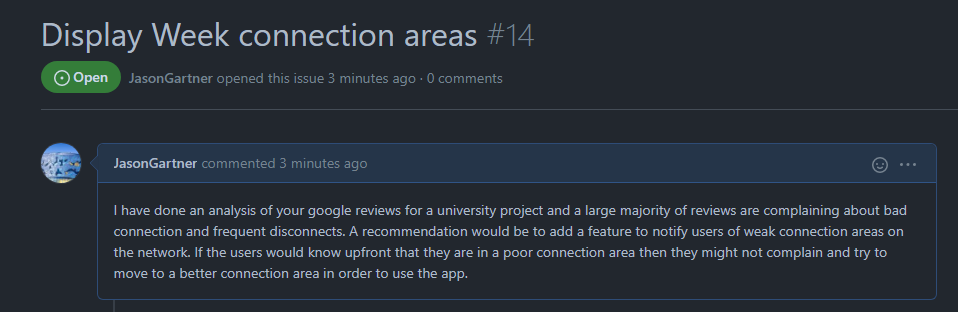

https://github.com/gjedeer/androidwisprclient/issues/15
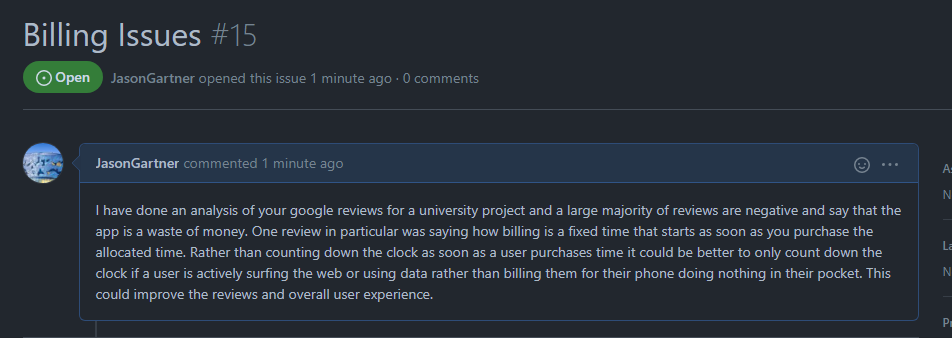